In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data_bike_sharing.csv")
df

dteday   hum  weathersit  holiday  season   atemp  temp  hr  \
0      2011-12-09  0.62           1        0       4  0.3485  0.36  16   
1      2012-06-17  0.64           1        0       2  0.5152  0.54   4   
2      2011-06-15  0.53           1        0       2  0.6212  0.62  23   
3      2012-03-31  0.87           2        0       2  0.3485  0.36   8   
4      2012-07-31  0.55           1        0       3  0.6970  0.76  18   
...           ...   ...         ...      ...     ...     ...   ...  ..   
12160  2012-01-25  0.75           1        0       1  0.2273  0.24   7   
12161  2012-07-06  0.62           1        0       3  0.7424  0.78   0   
12162  2012-02-20  0.60           2        1       1  0.2121  0.24   5   
12163  2012-03-31  0.77           2        0       2  0.4242  0.42   2   
12164  2011-04-28  0.47           1        0       2  0.6212  0.64  18   

       casual  registered  cnt  
0          24         226  250  
1           2          16   18  
2          17          90  107  
3          19         126  145  
4          99         758  857  
...       ...         ...  ...  
12160      14         243  257  
12161      39          63  102  
12162       0           6    6  
12163      14          55   69  
12164      44         486  530  

[12165 rows x 11 columns]

# Data Understanding

- dteday: date
- season: season (1: winter, 2: spring, 3: summer, 4: fall)
- hr: hour (0 to 23)
- holiday: holiday or not
- temp: normalized temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale)
- hum: normalized humidity. The values are divided into 100 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered
- weathersit<br>
1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<Br>

Tujuan dari penelitian ini adalah 

1. Melihat apakah ada pattern, trends, dan korelasi dari dataset untuk memperdalam informasi guna meningkatkan insight busniness.
2. Menentukan karakteristik yang paling berdampak pada rental
3. Memprediksi jumlah nilai 'cnt' berdasarkan features yang ada

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.describe(include='all')

dteday           hum    weathersit       holiday        season  \
count        12165  12165.000000  12165.000000  12165.000000  12165.000000   
unique         731           NaN           NaN           NaN           NaN   
top     2012-03-02           NaN           NaN           NaN           NaN   
freq            22           NaN           NaN           NaN           NaN   
mean           NaN      0.625451      1.416934      0.029758      2.488615   
std            NaN      0.192102      0.635937      0.169925      1.106157   
min            NaN      0.000000      1.000000      0.000000      1.000000   
25%            NaN      0.470000      1.000000      0.000000      2.000000   
50%            NaN      0.620000      1.000000      0.000000      2.000000   
75%            NaN      0.780000      2.000000      0.000000      3.000000   
max            NaN      1.000000      4.000000      1.000000      4.000000   

               atemp          temp            hr        casual    registered  \
count   12165.000000  12165.000000  12165.000000  12165.000000  12165.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        0.476996      0.498185     11.519770     35.834443    153.436580   
std         0.171857      0.192492      6.931872     49.489286    151.046123   
min         0.000000      0.020000      0.000000      0.000000      0.000000   
25%         0.333300      0.340000      6.000000      4.000000     34.000000   
50%         0.484800      0.500000     12.000000     17.000000    115.000000   
75%         0.621200      0.660000     18.000000     49.000000    220.000000   
max         1.000000      1.000000     23.000000    362.000000    876.000000   

                 cnt  
count   12165.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean      189.271023  
std       181.223903  
min         1.000000  
25%        40.000000  
50%       142.000000  
75%       282.000000  
max       970.000000

# Cleansing Data

## Missing Data

In [5]:
df.count()

dteday        12165
hum           12165
weathersit    12165
holiday       12165
season        12165
atemp         12165
temp          12165
hr            12165
casual        12165
registered    12165
cnt           12165
dtype: int64

In [6]:
print(df.isna().sum())

dteday        0
hum           0
weathersit    0
holiday       0
season        0
atemp         0
temp          0
hr            0
casual        0
registered    0
cnt           0
dtype: int64


Tidak ada data yang missing

## Data Duplicated

In [7]:
df[df.duplicated()==True]

Empty DataFrame
Columns: [dteday, hum, weathersit, holiday, season, atemp, temp, hr, casual, registered, cnt]
Index: []

Tidak ada data yang duplicate

## Data Formating

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


Column dteday tidak menggunakan tipe data yang tepat yaitu datetime, maka kita akan mengganti format tersebut

In [9]:
df['dteday'] = pd.to_datetime(df['dteday'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      12165 non-null  datetime64[ns]
 1   hum         12165 non-null  float64       
 2   weathersit  12165 non-null  int64         
 3   holiday     12165 non-null  int64         
 4   season      12165 non-null  int64         
 5   atemp       12165 non-null  float64       
 6   temp        12165 non-null  float64       
 7   hr          12165 non-null  int64         
 8   casual      12165 non-null  int64         
 9   registered  12165 non-null  int64         
 10  cnt         12165 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(7)
memory usage: 1.0 MB


Setelah kita lihat data nya, dapat dikatakan bahwa

1. Dataset ini tidak memiliki missing value
2. Tidak ada data yang duplicate
3. Format dteday telah diubah dari object ke datetime

## Drop Data

Kita akan drop data atemp karena data tersebut mirip atau bisa dikatakan, telah direperesentasikan oleh data temperature

In [10]:
df.drop('atemp', axis=1, inplace=True)

# Data Preparation

In [11]:
df.head()

dteday   hum  weathersit  holiday  season  temp  hr  casual  registered  \
0 2011-12-09  0.62           1        0       4  0.36  16      24         226   
1 2012-06-17  0.64           1        0       2  0.54   4       2          16   
2 2011-06-15  0.53           1        0       2  0.62  23      17          90   
3 2012-03-31  0.87           2        0       2  0.36   8      19         126   
4 2012-07-31  0.55           1        0       3  0.76  18      99         758   

   cnt  
0  250  
1   18  
2  107  
3  145  
4  857

## Split date to each Month and Day name

In [12]:
from datetime import datetime


df['year'] = pd.DatetimeIndex(df['dteday']).year
df['month'] = df['dteday'].dt.month_name()
df['day'] = df['dteday'].dt.day_name()

month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

Kita akan memecah column 'dteday' sehingga column kita mendapatkan column baru yang dapat digunakan dalam pemodelan

## Count Temperature by celcius

In [13]:
#Menghitung Nilai Celcius 

df['temp_celsius'] = df['temp']  * (39-(-8)) + (-8)

df.drop('temp', axis=1, inplace=True)

Kita juga akan melakukan pengkategorian untuk hari kerja dan hari libur, serta pengkategorian waktu yang ada. Tujuannya adalah untuk mempermudah visualisasi serta mendapatkan insight dari feature tersebut.

## Day Category

Pengkategorian jenis hari akan dibagi sesuai dengan jenis nya, dimana Senin - Jumat adalah Weekdays (Hari Kerja). Sedangkan Sabtu - Minggu adalah Weekends (Akhir Pekan).

In [14]:
weekend_days = ["Saturday", "Sunday"]

df['week_category'] = df['day'].apply(
    lambda x: 'Weekend' if x in weekend_days else 'Weekday'
)

## Hour Category

Kita juga akan mengasumsikan terdapat 4 jenis Waktu. Yaitu

1. Early Morning 0:00 - 06:00 (Dini Hari)
2. Morning 06:00 - 12:00 (Pagi Hari)
3. Afternoon 12:00 - 18:00 (Siang Hari)
4. Evening 18:00 - 24:00 (Malam Hari)

In [15]:
hour_category = [0, 6, 12, 18, 24]
hour_labels = ['Early Morning', 'Morning', 'Afternoon', 'Evening']
df['hour_category'] = pd.cut(df['hr'], bins=hour_category, labels=hour_labels, right=False)

## Coorelation Heatmap

Kita akan melihat korelasi kolom non kategorial

In [16]:
df_corr_check = df.copy()

df_corr_check['dteday'] = df_corr_check['dteday'].astype(str)
numerical_df = df_corr_check[['hum', 'temp_celsius', 'hr', 'casual', 'registered', 'cnt']].select_dtypes(include=['number'])

correlation_matrix = numerical_df.corr()
print(correlation_matrix)

                   hum  temp_celsius        hr    casual  registered       cnt
hum           1.000000     -0.068842 -0.279156 -0.345498   -0.269805 -0.319227
temp_celsius -0.068842      1.000000  0.143867  0.456828    0.331619  0.401149
hr           -0.279156      0.143867  1.000000  0.303310    0.374755  0.395179
casual       -0.345498      0.456828  0.303310  1.000000    0.506877  0.695555
registered   -0.269805      0.331619  0.374755  0.506877    1.000000  0.971898
cnt          -0.319227      0.401149  0.395179  0.695555    0.971898  1.000000


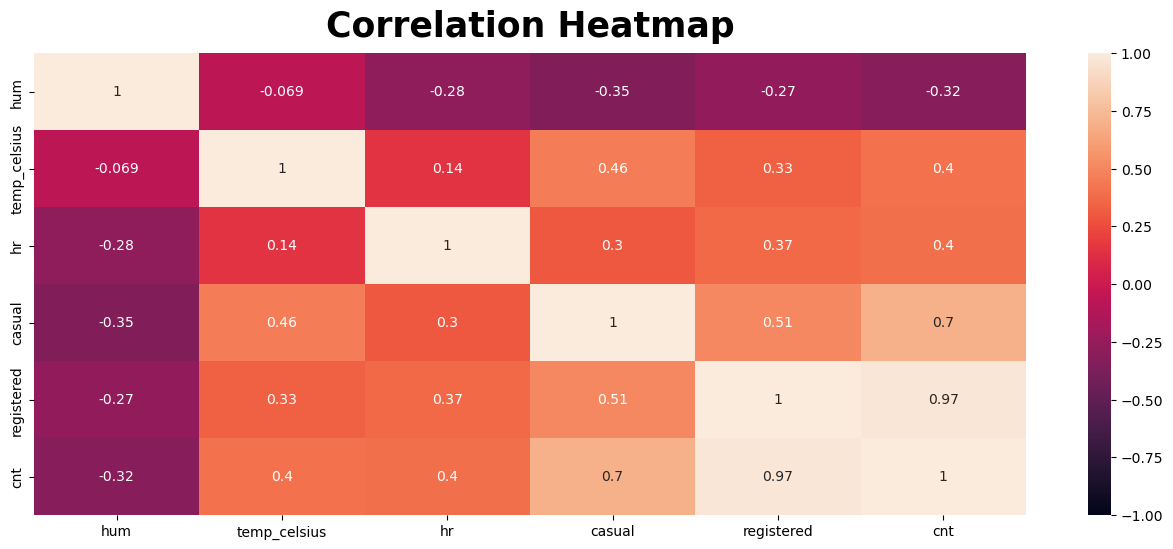

In [17]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':25, 'fontweight':'bold'}, pad=12)
plt.show()

Kita akan memetakan kolom mana yang memiliki korelasi antara kolom lainnya. Karena tujuan kita adalah ingin menganalisa data 'cnt' atau jumlah pengguna sepeda, maka kita akan lihat korelasi antara 'cnt' dengan 'hum', 'temp', 'hr'

## Outliers

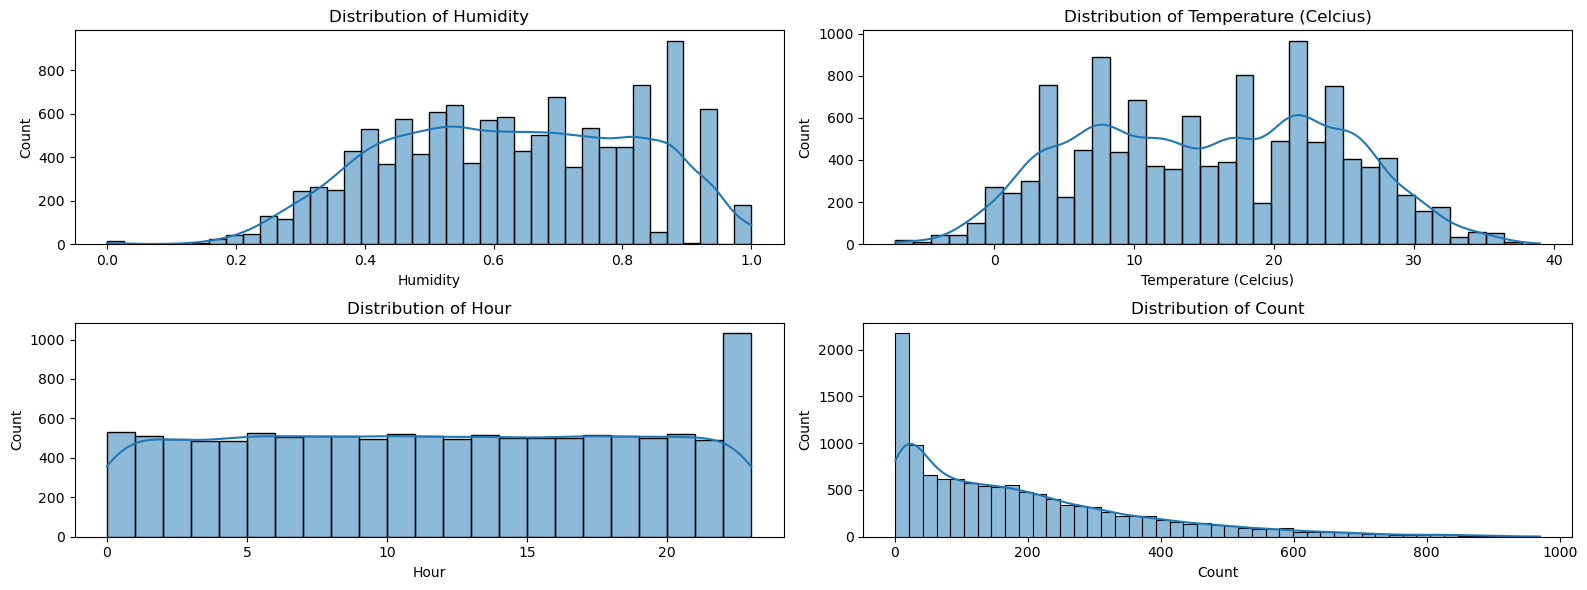

In [18]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize = (16,6))

sns.histplot(ax = ax[0,0], data = df['hum'], kde=True)
sns.histplot(ax = ax[0,1], data = df['temp_celsius'], kde=True)
sns.histplot(ax = ax[1,0], data = df['hr'], kde=True)
sns.histplot(ax = ax[1,1], data = df['cnt'], kde=True)

ax[0,0].set_title('Distribution of Humidity')
ax[0,0].set_xlabel('Humidity')
ax[0,0].set_ylabel('Count')

ax[0,1].set_title('Distribution of Temperature (Celcius)')
ax[0,1].set_xlabel('Temperature (Celcius)')
ax[0,1].set_ylabel('Count')

ax[1,0].set_title('Distribution of Hour')
ax[1,0].set_xlabel('Hour')
ax[1,0].set_ylabel('Count')

ax[1,1].set_title('Distribution of Count')
ax[1,1].set_xlabel('Count')
ax[1,1].set_ylabel('Count')

plt.tight_layout()
plt.show()

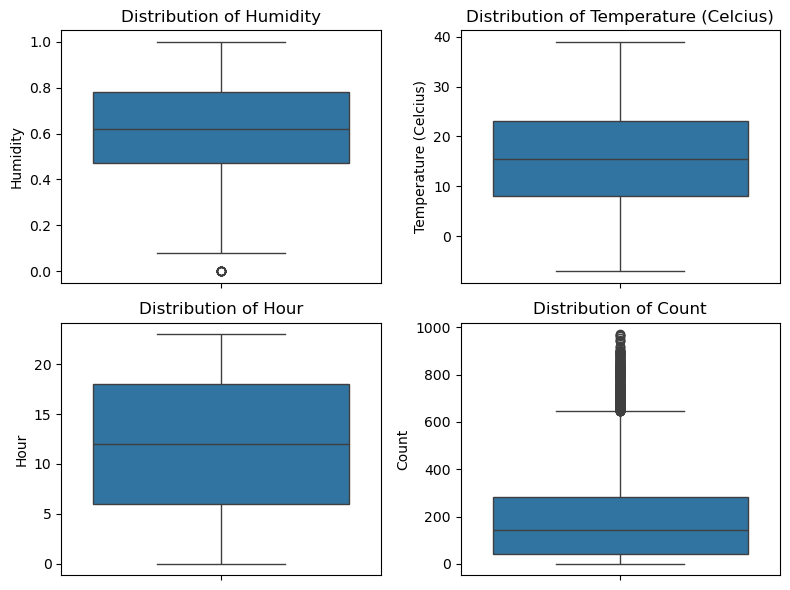

In [19]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize = (8,6))

sns.boxplot(ax = ax[0,0], data = df['hum'])
sns.boxplot(ax = ax[0,1], data = df['temp_celsius'])
sns.boxplot(ax = ax[1,0], data = df['hr'])
sns.boxplot(ax = ax[1,1], data = df['cnt'])

ax[0,0].set_title('Distribution of Humidity')
ax[0,0].set_ylabel('Humidity')

ax[0,1].set_title('Distribution of Temperature (Celcius)')
ax[0,1].set_ylabel('Temperature (Celcius)')

ax[1,0].set_title('Distribution of Hour')
ax[1,0].set_ylabel('Hour')

ax[1,1].set_title('Distribution of Count')
ax[1,1].set_ylabel('Count')

plt.tight_layout()
plt.show()

Dari data di atas, terdapat outlier pada bagian count

Kita akan melakukan perbandingan outlier pengguna dengan status casual dan registered

In [20]:
df[['casual', 'registered']].describe()

casual    registered
count  12165.000000  12165.000000
mean      35.834443    153.436580
std       49.489286    151.046123
min        0.000000      0.000000
25%        4.000000     34.000000
50%       17.000000    115.000000
75%       49.000000    220.000000
max      362.000000    876.000000

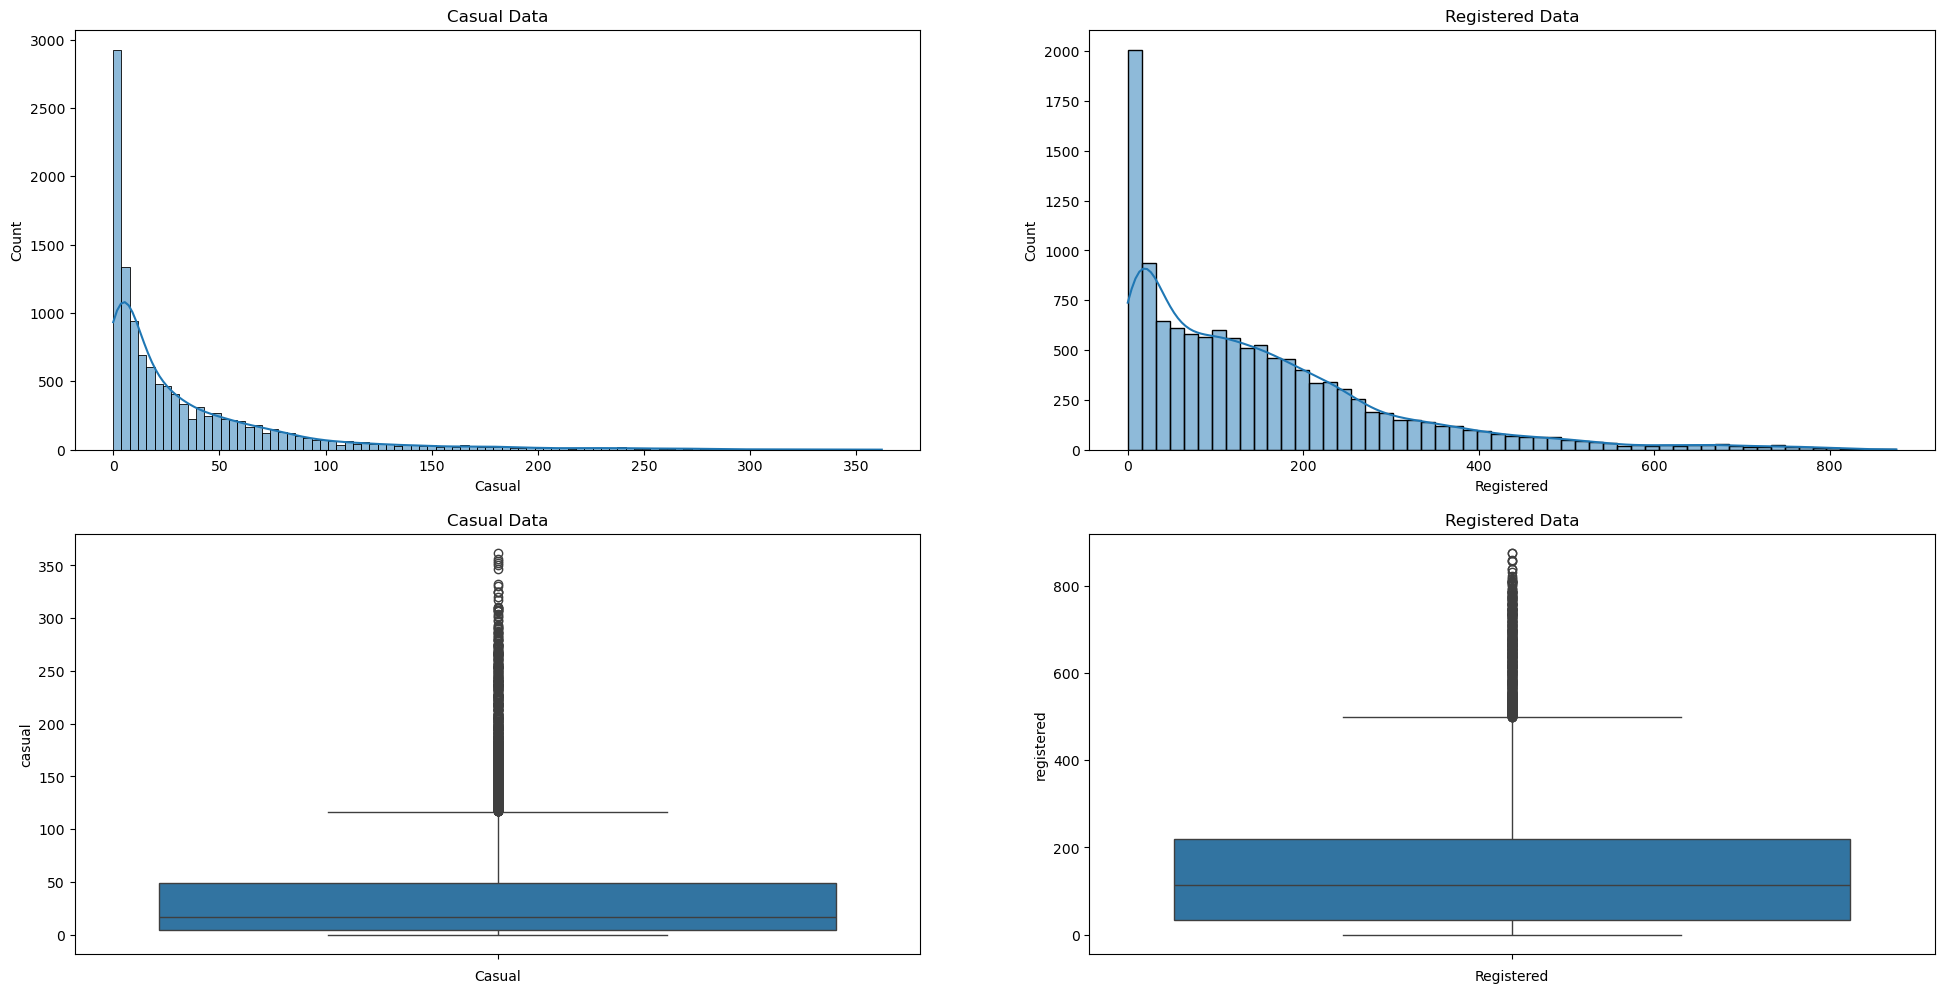

In [21]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize = (24,12))

sns.histplot(data = df['casual'], kde=True, ax=ax[0,0])
sns.histplot(data = df['registered'], kde=True, ax=ax[0,1])

sns.boxplot(data = df['casual'], ax=ax[1,0])
sns.boxplot(data = df['registered'], ax=ax[1,1])

ax[0,0].set_title('Casual Data')
ax[0,0].set_xlabel('Casual')

ax[0,1].set_title('Registered Data')
ax[0,1].set_xlabel('Registered')

ax[1,0].set_title('Casual Data')
ax[1,0].set_xlabel('Casual')

ax[1,1].set_title('Registered Data')
ax[1,1].set_xlabel('Registered')

plt.show()

## Cleansing Outlier

Kita akan melakukan cleansing data pada column 'casual', 'registered', dan 'cnt' agar model lebih mudah memprediksi dengan akurat. Kita akan melakukan cleansing outlier dengan metode IQR

In [22]:
q1_casual = df['casual'].quantile(0.25)
q3_casual = df['casual'].quantile(0.75)

iqr_casual= q3_casual-q1_casual

data_min_casual = q1_casual-(1.5*iqr_casual)
data_max_casual = q3_casual+(1.5*iqr_casual)

df = df[(df['casual'] >= data_min_casual) & (df['casual'] <= data_max_casual)]

q1_registered = df['registered'].quantile(0.25)
q3_registered = df['registered'].quantile(0.75)

iqr_registered= q3_registered-q1_registered

data_min_registered = q1_registered-(1.5*iqr_registered)
data_max_registered = q3_registered+(1.5*iqr_registered)

df = df[(df['registered'] >= data_min_registered) & (df['registered'] <= data_max_registered)]

q1_cnt = df['cnt'].quantile(0.25)
q3_cnt = df['cnt'].quantile(0.75)

iqr_cnt= q3_cnt-q1_cnt

data_min_cnt = q1_cnt-(1.5*iqr_cnt)
data_max_cnt = q3_cnt+(1.5*iqr_cnt)

df = df[(df['cnt'] >= data_min_cnt) & (df['cnt'] <= data_max_cnt)]

df

dteday   hum  weathersit  holiday  season  hr  casual  registered  \
0     2011-12-09  0.62           1        0       4  16      24         226   
1     2012-06-17  0.64           1        0       2   4       2          16   
2     2011-06-15  0.53           1        0       2  23      17          90   
3     2012-03-31  0.87           2        0       2   8      19         126   
5     2012-10-01  0.72           1        0       4   0       6          39   
...          ...   ...         ...      ...     ...  ..     ...         ...   
12159 2012-08-16  0.54           1        0       3   9      41         296   
12160 2012-01-25  0.75           1        0       1   7      14         243   
12161 2012-07-06  0.62           1        0       3   0      39          63   
12162 2012-02-20  0.60           2        1       1   5       0           6   
12163 2012-03-31  0.77           2        0       2   2      14          55   

       cnt  year     month        day  temp_celsius week_category  \
0      250  2011  December     Friday          8.92       Weekday   
1       18  2012      June     Sunday         17.38       Weekend   
2      107  2011      June  Wednesday         21.14       Weekday   
3      145  2012     March   Saturday          8.92       Weekend   
5       45  2012   October     Monday         13.62       Weekday   
...    ...   ...       ...        ...           ...           ...   
12159  337  2012    August   Thursday         25.84       Weekday   
12160  257  2012   January  Wednesday          3.28       Weekday   
12161  102  2012      July     Friday         28.66       Weekday   
12162    6  2012  February     Monday          3.28       Weekday   
12163   69  2012     March   Saturday         11.74       Weekend   

       hour_category  
0          Afternoon  
1      Early Morning  
2            Evening  
3            Morning  
5      Early Morning  
...              ...  
12159        Morning  
12160        Morning  
12161  Early Morning  
12162  Early Morning  
12163  Early Morning  

[10687 rows x 15 columns]

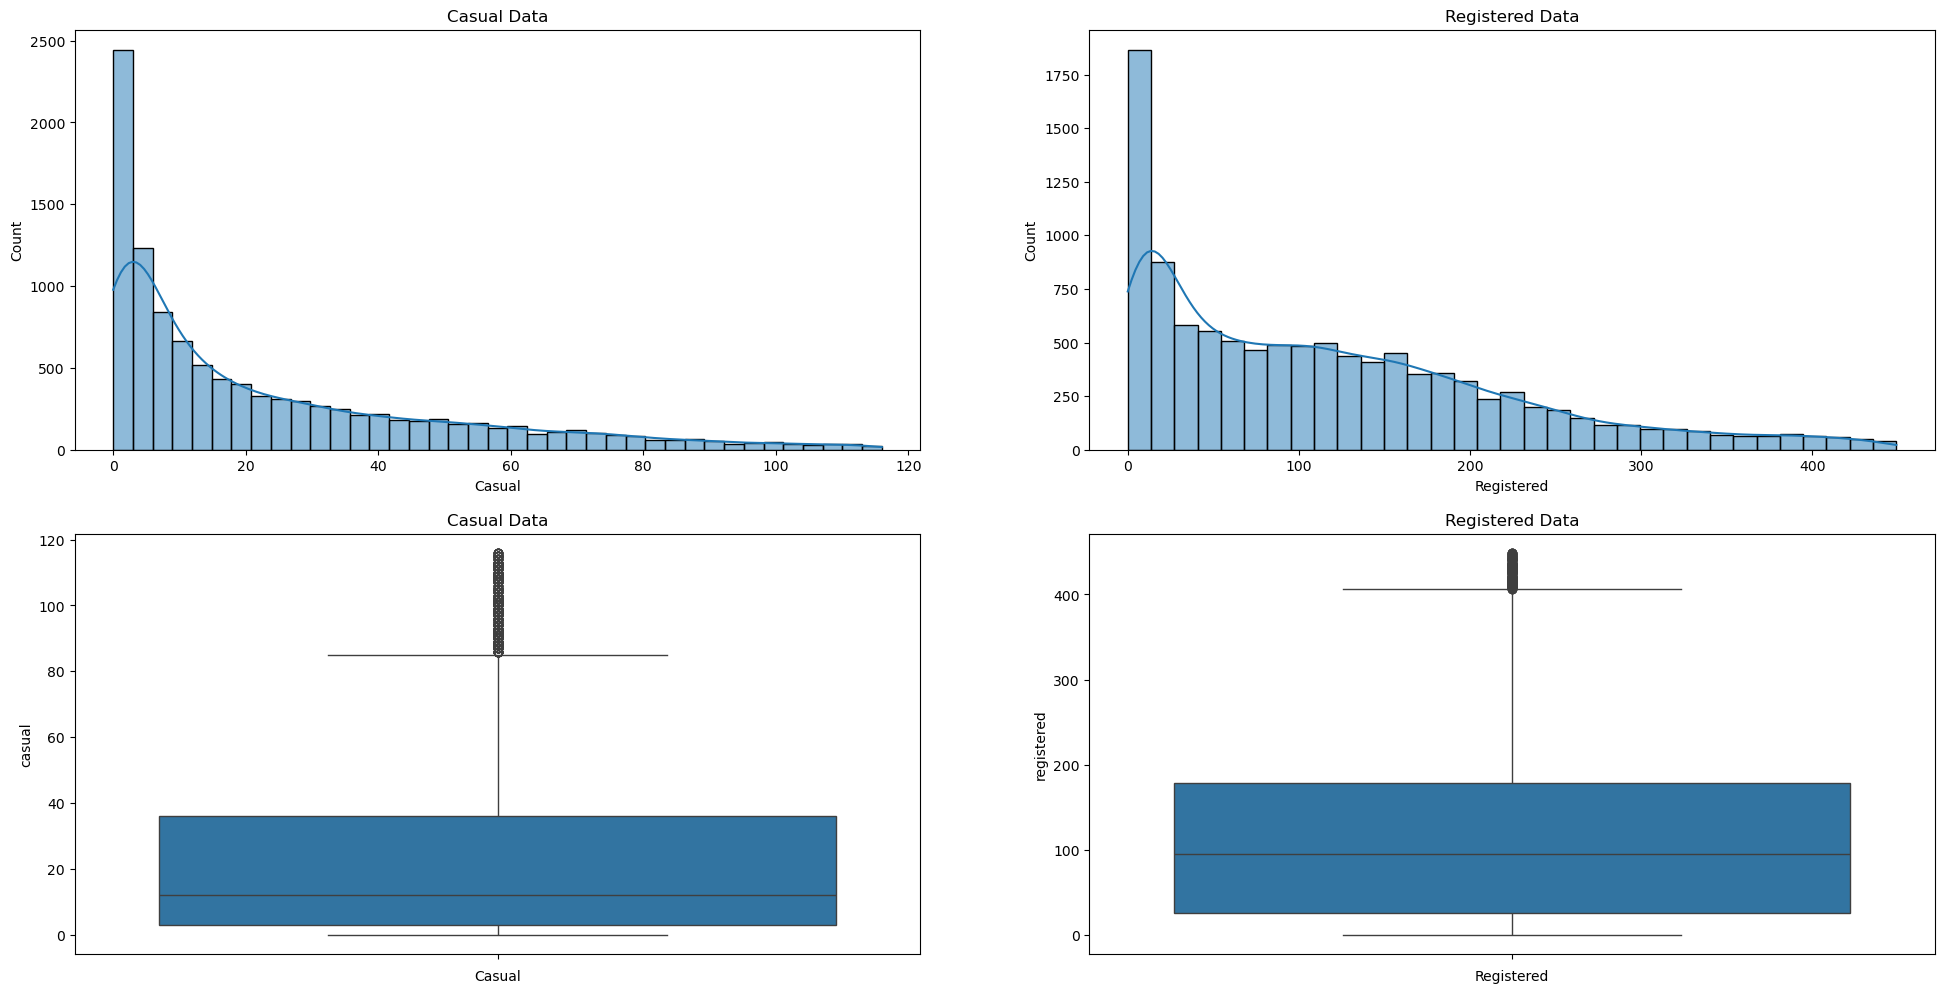

In [23]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize = (24,12))

sns.histplot(data = df['casual'], kde=True, ax=ax[0,0])
sns.histplot(data = df['registered'], kde=True, ax=ax[0,1])

sns.boxplot(data = df['casual'], ax=ax[1,0])
sns.boxplot(data = df['registered'], ax=ax[1,1])

ax[0,0].set_title('Casual Data')
ax[0,0].set_xlabel('Casual')

ax[0,1].set_title('Registered Data')
ax[0,1].set_xlabel('Registered')

ax[1,0].set_title('Casual Data')
ax[1,0].set_xlabel('Casual')

ax[1,1].set_title('Registered Data')
ax[1,1].set_xlabel('Registered')

plt.show()

Meskipun kita telah menghapus outlier nya menggunakan IQR, namun masih terdapat outlier nya. Namun kita akan tetap melanjutkan ke tahap selanjutnya

# Exploratory Data Analysis (EDA) 

## Proportion of Casual vs Registered

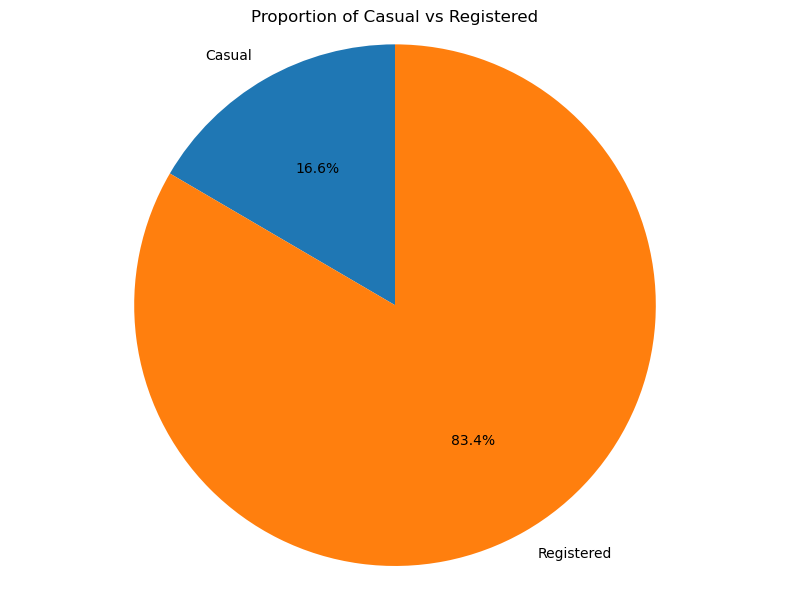

In [24]:
total_casual = df['casual'].sum()
total_registered = df['registered'].sum()

plt.figure(figsize=(8, 6))

plt.pie(x=[total_casual, total_registered], labels=['Casual', 'Registered'], autopct='%1.1f%%', startangle=90)

plt.title("Proportion of Casual vs Registered")
plt.axis('equal')
plt.tight_layout()
plt.show()


Jika dilihat, lebih banyak pelanggan dengan tipe Registered atau terdaftar, dibandingkan dengan Casual

## Passenger/Count Time Series

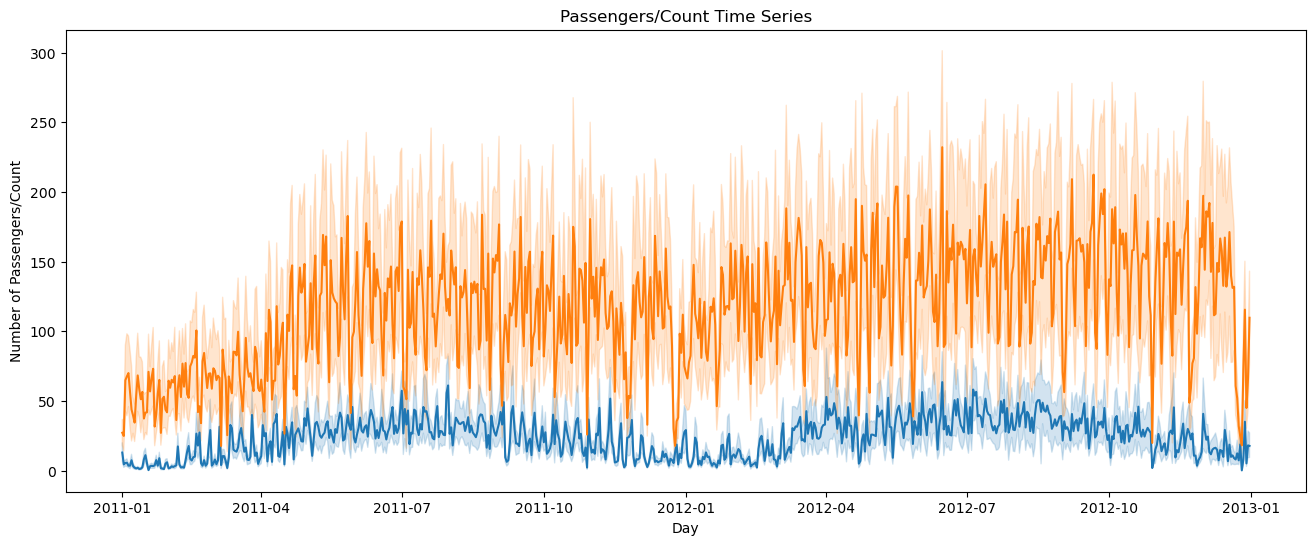

In [25]:
plt.figure(figsize=(16, 6))

sns.lineplot(data=df, x='dteday', y='casual')

sns.lineplot(data=df, x='dteday', y='registered')

plt.title('Passengers/Count Time Series')
plt.xlabel('Day')
plt.ylabel('Number of Passengers/Count')
plt.show()

## Count Bike per Month

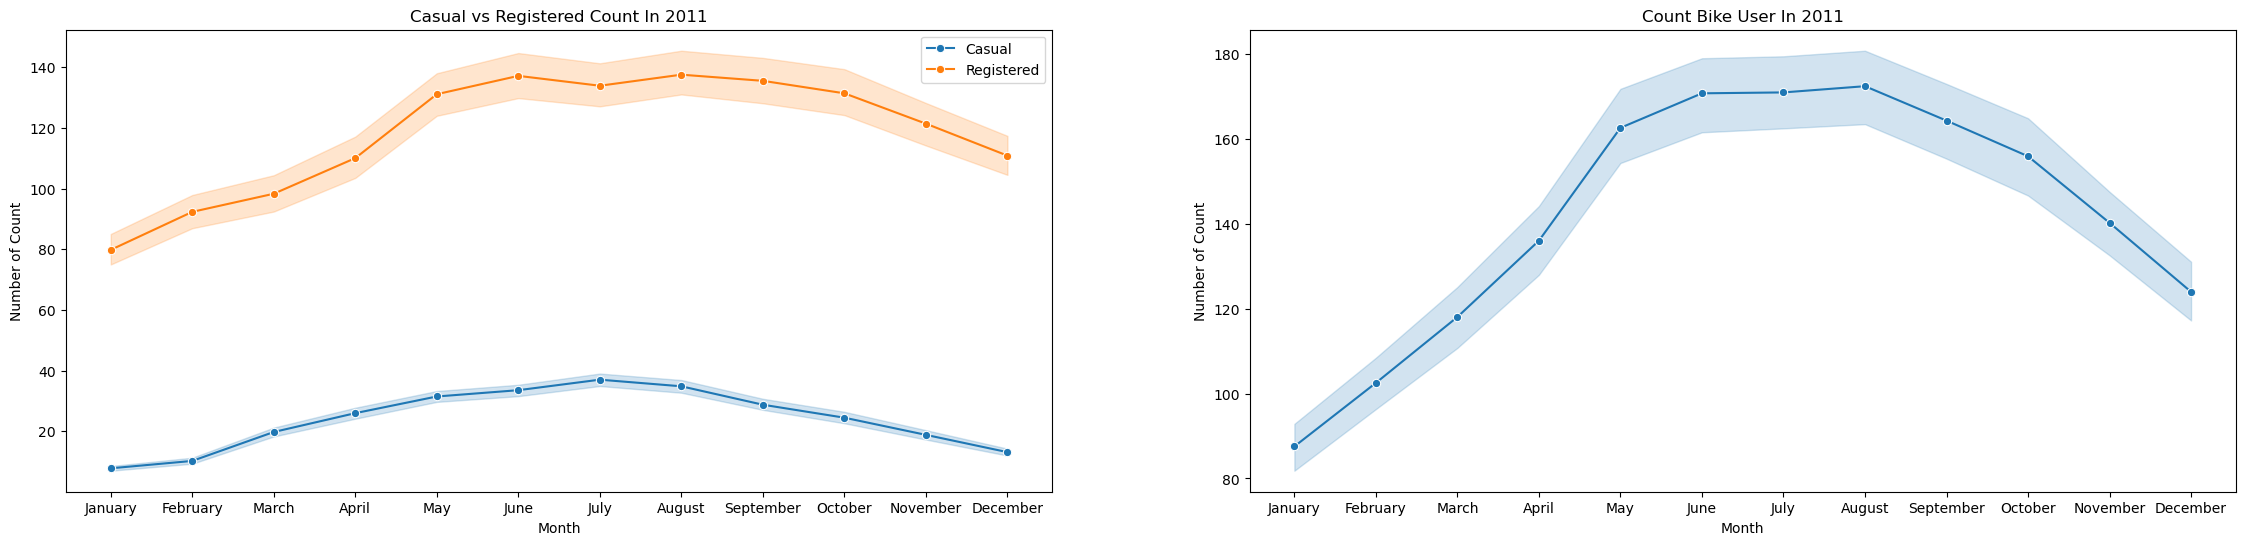

In [26]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize = (28,6))

sns.lineplot(data=df, x="month", y="casual", label="Casual", marker='o',ax=ax[0])
sns.lineplot(data=df, x="month", y="registered", label="Registered", marker='o', ax=ax[0])

sns.lineplot(data=df, x="month", y="cnt", marker='o', ax=ax[1])

ax[0].set_title('Casual vs Registered Count In 2011')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Number of Count')

ax[1].set_title('Count Bike User In 2011')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Number of Count')
plt.show()

Dari grafik di atas, terlihat bahwa memang pengguna Registered lebih banyak di banding dengan Total Casual. Namun yang menarik adalah, adanya penurunan penggunaan sepeda pada bulan January-Febuary dan bulan Oktober-Desember. Dikarenakan dataset ini memiliki 4 musim, maka kita dapat mengasumsikan musim ini berdasarkan dengan suhu pada bulan tersebut.

Dikutip dari website https://cie.co/main/usa/#:~:text=Negara%20yang%20ibu%20kotanya%20di,Musim%20dingin%3A%20Desember%20%E2%80%93%20Februari, berikit merupakan pembagian musim berdasarkan dengan Bulan

1. Winter = December - February
2. Spring = March - May
3. Summer =  June - August
4. Fall = September - November

Berdasarkan grafik di atas, bisa dikatakan terpadat penurunan pada Musim Winter (Dingin) dan Musim Fall (Gugur) untuk Pengguna sepeda

## Temperature Each Month

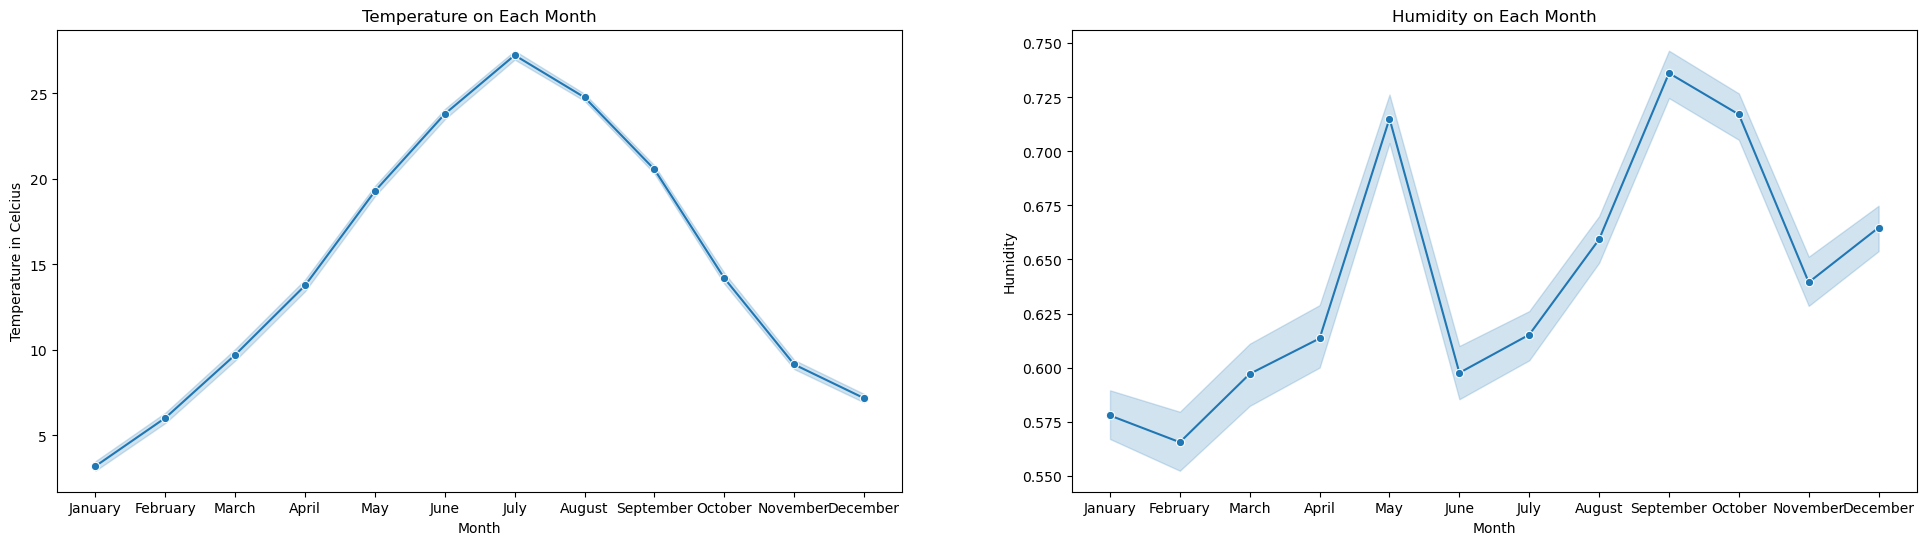

In [27]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize = (24,6))

sns.lineplot(data = df, x="month", y="temp_celsius", marker='o', ax=ax[0])

sns.lineplot(data = df, x="month", y="hum", marker='o', ax=ax[1])

ax[0].set_title('Temperature on Each Month')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Temperature in Celcius')

ax[1].set_title('Humidity on Each Month')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Humidity')

plt.show()

## Relationship Temperature and Humidity per Season

<Figure size 2400x600 with 0 Axes>

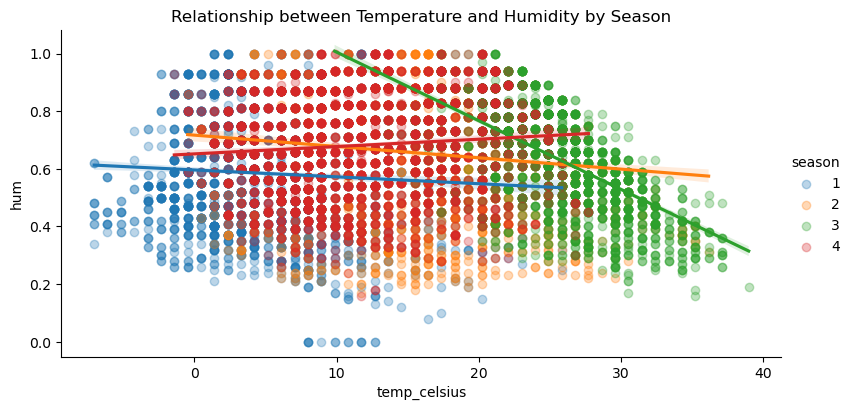

In [28]:
plt.figure(figsize=(24, 6))

sns.lmplot(data=df, x='temp_celsius', y='hum', hue='season', scatter_kws={'alpha':0.3}, height=4,
    aspect=2 )

plt.title("Relationship between Temperature and Humidity by Season")
plt.show()

Kita akan melakukan uji spearmanr untuk menguji korelasi antara bulan dan temperature pada dataset ini

## Correlation Test

H0 : Tidak ada korelasi antara 'month' dan 'temp_celcius'<br>
H1 : Ada korelasi antara 'month' dan 'temp_celcius'

In [29]:
from scipy.stats import spearmanr, pearsonr

x = df['month']
y = df['temp_celsius']

res_spearman = spearmanr(x, y)
res_spearman

SignificanceResult(statistic=np.float64(0.11554446605729389), pvalue=np.float64(4.335895855767077e-33))

Uji ini membuktikan bahwa H0 ditolak, menyatakan bahwa tiap musim (Per Bulan) akan berpengaruh terhadap Temperature.

Sekarang kita akan menguji apakah temperature berdampak pada pengguna Casual dan juga Registered

In [30]:
def correlation_test(df, pairs):
    results = []

    for x_col, y_col in pairs:
        x = df[x_col]
        y = df[y_col]
        stat, pval = pearsonr(x, y)

        results.append({
            'Features': x_col,
            'Target': y_col,
            'Statistic': stat,
            'P-value': pval
        })

    return pd.DataFrame(results)

In [31]:
pairs = [
    ('temp_celsius', 'casual'),
    ('temp_celsius', 'registered'),
    ('temp_celsius', 'cnt'),
    ('hum', 'casual'),
    ('hum', 'registered'),
    ('hum', 'cnt')
]

df_results = correlation_test(df, pairs)
df_results


Features      Target  Statistic        P-value
0  temp_celsius      casual   0.503128   0.000000e+00
1  temp_celsius  registered   0.295546  2.234654e-214
2  temp_celsius         cnt   0.361980   0.000000e+00
3           hum      casual  -0.336058  2.055389e-280
4           hum  registered  -0.260977  6.358930e-166
5           hum         cnt  -0.296174  2.525351e-215

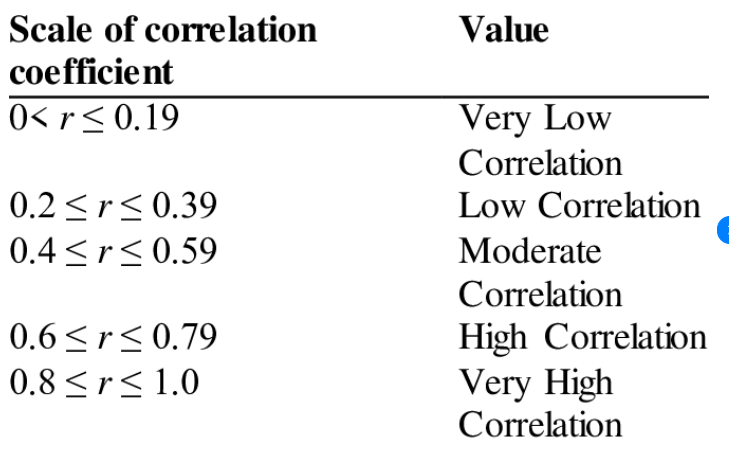

Dikutip dari : https://www.researchgate.net/figure/The-scale-of-Pearsons-Correlation-Coefficient_tbl1_345693737

Terlihat, dari hasil ujicoba korelasi dengan Spearman, menunjukan bahwa : 

1. Terdapat korelasi antara **temp_celsius** dengan **casual**, dengan statistic 0.503, maka korelasi nya bisa dianggap sebagai <u>**Moderate Relationship**</u>
2. Terdapat korelasi antara **temp_celsius** dengan **registered**, dengan statistic 0.295, maka korelasi nya bisa dianggap sebagai <u>**Low Relationship**</u>
2. Terdapat korelasi antara **temp_celsius** dengan **cnt**, dengan statistic 0.361, maka korelasi nya bisa dianggap sebagai <u>**Low Relationship**</u>

Dari hasil correlation diatas, kita mendapatkan kesimpulan bahwa

1. Suhu Temperature cukup berdampak pada pengguna sepeda tipe Casual
2. Suhu Temperature tidak begitu berpengaruh pada pengguna sepeda tipe Registered

Data Humidity menunjukan bahwa adanya korelasi negatif yang dikategorikan lemah pada ketiga features

## Count per Hour

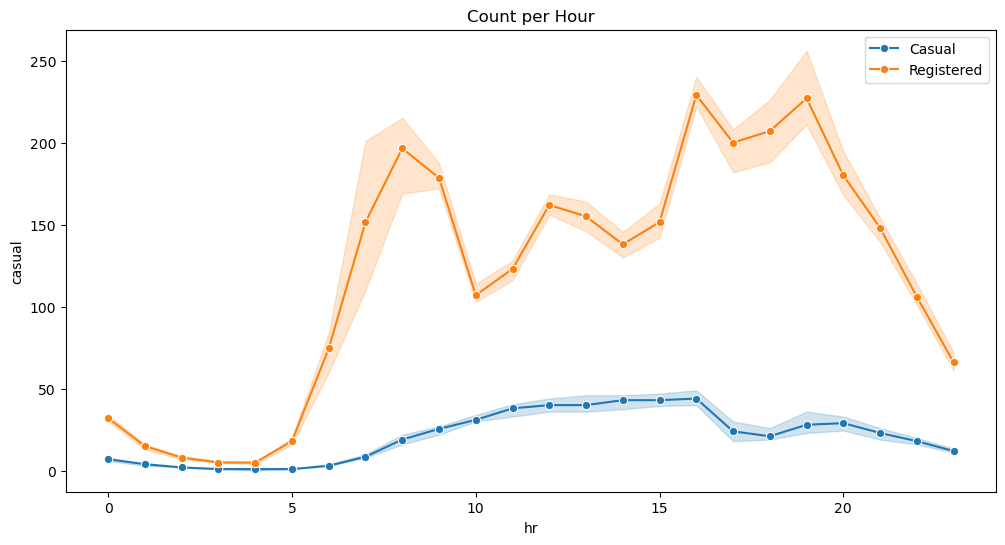

In [32]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='hr', y='casual', marker='o', label="Casual", estimator=np.median)
sns.lineplot(data=df, x='hr', y='registered', marker='o', label="Registered", estimator=np.median)
plt.title('Count per Hour')
plt.show()

## Average Hour User during the Week

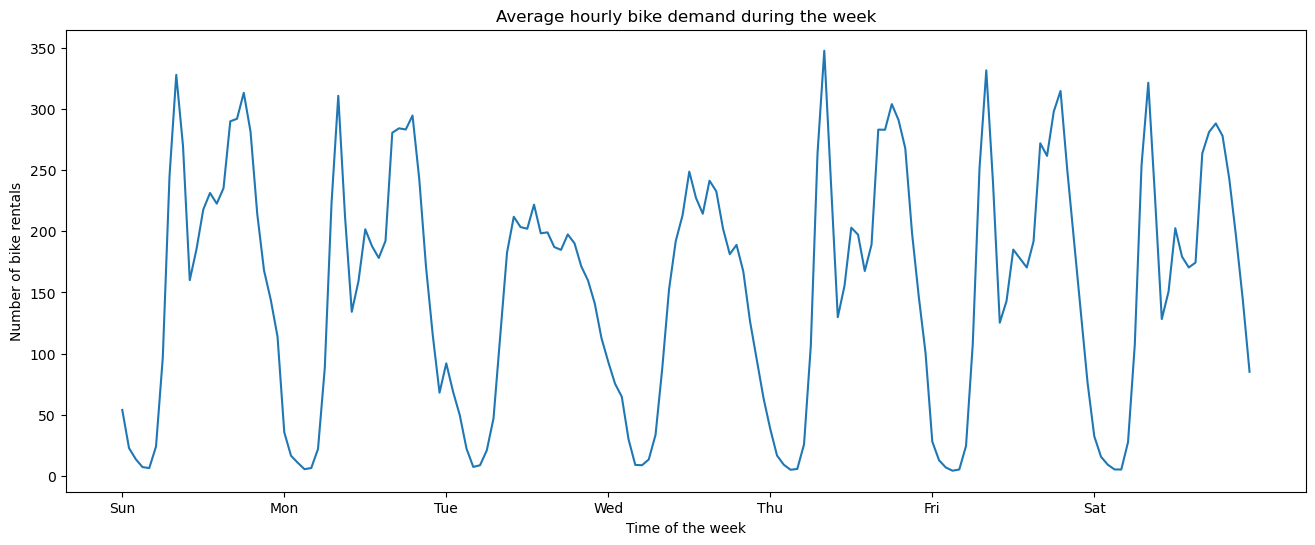

In [33]:
fig, ax = plt.subplots(figsize=(16, 6))
average_week_demand = df.groupby(["day", "hr"])["cnt"].mean()
average_week_demand.plot(ax=ax)
_ = ax.set(
    title="Average hourly bike demand during the week",
    xticks=[i * 24 for i in range(7)],
    xticklabels=["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"],
    xlabel="Time of the week",
    ylabel="Number of bike rentals",
)

## Fraction of Rented Fleet Demand

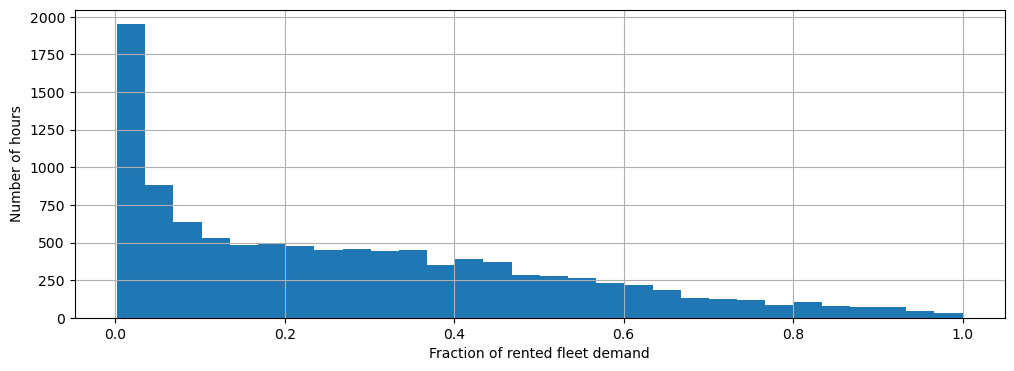

In [34]:
y = df["cnt"] / df["cnt"].max()
fig, ax = plt.subplots(figsize=(12, 4))
y.hist(bins=30, ax=ax)
_ = ax.set(
    xlabel="Fraction of rented fleet demand",
    ylabel="Number of hours",
)

## User per Season

Kita juga akan melihat perkembangan pengunjung antar Season & Weather

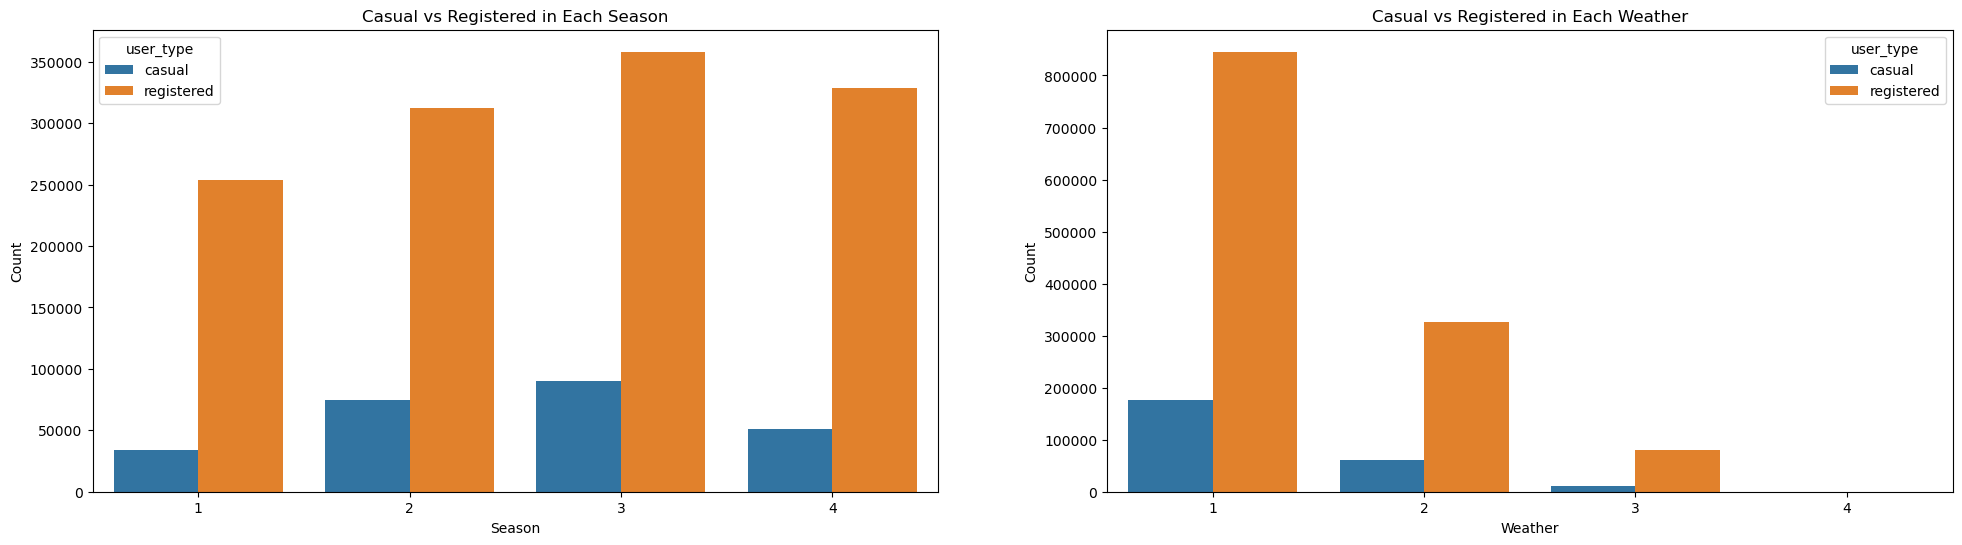

In [35]:
df_melted_season = pd.melt(df, id_vars=['season'], value_vars=['casual', 'registered'], var_name='user_type', value_name='count')
df_weather = pd.melt(df, id_vars=['weathersit'], value_vars=['casual', 'registered'], var_name='user_type', value_name='count')

fig, ax = plt.subplots(ncols=2, nrows=1, figsize = (24,6))

sns.barplot(data=df_melted_season, x="season", y="count", hue="user_type", errorbar=None, estimator="sum", ax=ax[0])
sns.barplot(data=df_weather, x="weathersit", y="count", hue="user_type", errorbar=None, estimator="sum", ax=ax[1])

ax[0].set_title("Casual vs Registered in Each Season")
ax[0].set_xlabel("Season")
ax[0].set_ylabel("Count")

ax[1].set_title("Casual vs Registered in Each Weather")
ax[1].set_xlabel("Weather")
ax[1].set_ylabel("Count")
plt.show()

Dari data di atas menunjukan bahwa terdapat perbedaan yang signifikan antara pengguna jenis Casual dan Registered.

Kedua pengguna lebih banyak menggunakan sepeda pada musim 3 yaitu **Summer** dan pengguna terkecil yaitu pada musim 1 yaitu **Winter**

# Feature Enggineering

In [36]:
df

dteday   hum  weathersit  holiday  season  hr  casual  registered  \
0     2011-12-09  0.62           1        0       4  16      24         226   
1     2012-06-17  0.64           1        0       2   4       2          16   
2     2011-06-15  0.53           1        0       2  23      17          90   
3     2012-03-31  0.87           2        0       2   8      19         126   
5     2012-10-01  0.72           1        0       4   0       6          39   
...          ...   ...         ...      ...     ...  ..     ...         ...   
12159 2012-08-16  0.54           1        0       3   9      41         296   
12160 2012-01-25  0.75           1        0       1   7      14         243   
12161 2012-07-06  0.62           1        0       3   0      39          63   
12162 2012-02-20  0.60           2        1       1   5       0           6   
12163 2012-03-31  0.77           2        0       2   2      14          55   

       cnt  year     month        day  temp_celsius week_category  \
0      250  2011  December     Friday          8.92       Weekday   
1       18  2012      June     Sunday         17.38       Weekend   
2      107  2011      June  Wednesday         21.14       Weekday   
3      145  2012     March   Saturday          8.92       Weekend   
5       45  2012   October     Monday         13.62       Weekday   
...    ...   ...       ...        ...           ...           ...   
12159  337  2012    August   Thursday         25.84       Weekday   
12160  257  2012   January  Wednesday          3.28       Weekday   
12161  102  2012      July     Friday         28.66       Weekday   
12162    6  2012  February     Monday          3.28       Weekday   
12163   69  2012     March   Saturday         11.74       Weekend   

       hour_category  
0          Afternoon  
1      Early Morning  
2            Evening  
3            Morning  
5      Early Morning  
...              ...  
12159        Morning  
12160        Morning  
12161  Early Morning  
12162  Early Morning  
12163  Early Morning  

[10687 rows x 15 columns]

## Timeseries Engineering

Dikarenakan model tidak mengerti bahwa waktu adalah sebuah siklus yang sifatnya berulang, maka kita akan melkukan fungsi trigonometric encoding terhadap fitur waktu.<br>

Hal ini bertujuan agar waktu dapat dimanfaatkan lebih efektif dalam model Machine Learning nanti

In [37]:
from sklearn.preprocessing import FunctionTransformer

def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))

def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

### Hour

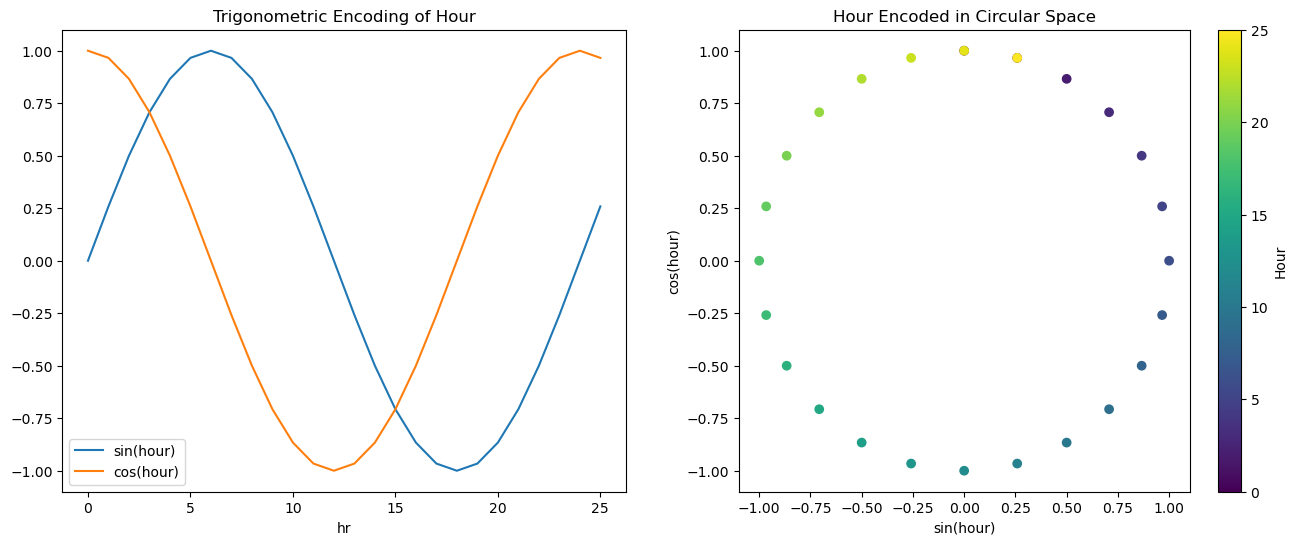

In [38]:
hour_df = pd.DataFrame(np.arange(26).reshape(-1, 1), columns=["hr"])

hour_df["hour_sin"] = sin_transformer(24).fit_transform(hour_df)["hr"]
hour_df["hour_cos"] = cos_transformer(24).fit_transform(hour_df)["hr"]

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].plot(hour_df["hr"], hour_df["hour_sin"], label="sin(hour)")
axs[0].plot(hour_df["hr"], hour_df["hour_cos"], label="cos(hour)")
axs[0].set_title("Trigonometric Encoding of Hour")
axs[0].set_xlabel("hr")
axs[0].legend()

sc = axs[1].scatter(hour_df["hour_sin"], hour_df["hour_cos"], c=hour_df["hr"], cmap="viridis")
axs[1].set_title("Hour Encoded in Circular Space")
axs[1].set_xlabel("sin(hour)")
axs[1].set_ylabel("cos(hour)")
fig.colorbar(sc, ax=axs[1], label="Hour")

plt.show()

df = df.merge(hour_df[['hr', 'hour_sin', 'hour_cos']], on='hr', how='left')

Jam 0 → (sin=0, cos=1)<br>
Jam 6 → (sin=1, cos=0)<Br>
Jam 12 → (sin=0, cos=-1)<br>
Jam 18 → (sin=-1, cos=0)<br>

Sumber : https://scikit-learn.org/stable/auto_examples/applications/plot_cyclical_feature_engineering.html

### Day of Week

In [39]:
# Week Trigonometric Encoding
dayof_week_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

day_of_week_df = pd.DataFrame(np.arange(7).reshape(-1, 1), columns=["day"])

day_of_week_df["day_of_week_sin"] = sin_transformer(7).fit_transform(day_of_week_df)["day"]
day_of_week_df["day_of_week_cos"] = cos_transformer(7).fit_transform(day_of_week_df)["day"]
day_of_week_df["day"] = dayof_week_names

df = df.merge(day_of_week_df[['day', 'day_of_week_sin', 'day_of_week_cos']], on='day', how='left')

### Month

In [40]:
# Month Trigonometric Encoding
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

month_df = pd.DataFrame(np.arange(12).reshape(-1, 1), columns=["month"])

month_df["month_sin"] = sin_transformer(12).fit_transform(month_df)["month"]
month_df["month_cos"] = cos_transformer(12).fit_transform(month_df)["month"]
month_df["month"] = month_names

df = df.merge(month_df[['month', 'month_sin', 'month_cos']], on='month', how='left')

### Year

In [41]:
# Year Trigonometric Encoding
year_names = ['2011', '2012']

year_df = pd.DataFrame(np.arange(2).reshape(-1, 1), columns=["year"])

year_df["year_sin"] = sin_transformer(2).fit_transform(year_df)["year"]
year_df["year_cos"] = cos_transformer(2).fit_transform(year_df)["year"]
year_df["year"] = year_names

df['year'] = df['year'].astype(str)
df = df.merge(year_df[['year', 'year_sin', 'year_cos']], on='year', how='left')

# Feature Selection

In [42]:
df.columns

Index(['dteday', 'hum', 'weathersit', 'holiday', 'season', 'hr', 'casual',
       'registered', 'cnt', 'year', 'month', 'day', 'temp_celsius',
       'week_category', 'hour_category', 'hour_sin', 'hour_cos',
       'day_of_week_sin', 'day_of_week_cos', 'month_sin', 'month_cos',
       'year_sin', 'year_cos'],
      dtype='object')

# Modeling

In [43]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from xgboost.sklearn import XGBRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score ,mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV

## Data Spliting

In [44]:
X = df.drop(['dteday','hr', 'casual', 'registered', 'cnt', 'year', 'month', 'day'], axis=1).copy()

# Log Trasnform
y = np.log1p(df['cnt']).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2042)

Penggunaan np.log1p bertujuan untuk meningkatkan stabilitas dan performa regression, khususnya pada matrix MAPE. 

Penggunaan np.log1 digunakan karena Nilai terdapat beberapa nilai value 'cnt' dengan jumlah kecil, misalnya pada dini hari.

## Encoding

In [45]:
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [46]:
categorical_cols = ['weathersit', 'holiday', 'season', 'hour_category', 'week_category']
numerical_cols = ['temp_celsius']

encoding = ColumnTransformer([
    ('One Hot Encoding', OneHotEncoder(drop='first'), categorical_cols),
    ('Standart Scaller', StandardScaler(), numerical_cols )
], remainder='passthrough')

df

dteday   hum  weathersit  holiday  season  hr  casual  registered  \
0     2011-12-09  0.62           1        0       4  16      24         226   
1     2012-06-17  0.64           1        0       2   4       2          16   
2     2011-06-15  0.53           1        0       2  23      17          90   
3     2012-03-31  0.87           2        0       2   8      19         126   
4     2012-10-01  0.72           1        0       4   0       6          39   
...          ...   ...         ...      ...     ...  ..     ...         ...   
10682 2012-08-16  0.54           1        0       3   9      41         296   
10683 2012-01-25  0.75           1        0       1   7      14         243   
10684 2012-07-06  0.62           1        0       3   0      39          63   
10685 2012-02-20  0.60           2        1       1   5       0           6   
10686 2012-03-31  0.77           2        0       2   2      14          55   

       cnt  year  ... week_category  hour_category  hour_sin  hour_cos  \
0      250  2011  ...       Weekday      Afternoon -0.866025 -0.500000   
1       18  2012  ...       Weekend  Early Morning  0.866025  0.500000   
2      107  2011  ...       Weekday        Evening -0.258819  0.965926   
3      145  2012  ...       Weekend        Morning  0.866025 -0.500000   
4       45  2012  ...       Weekday  Early Morning  0.000000  1.000000   
...    ...   ...  ...           ...            ...       ...       ...   
10682  337  2012  ...       Weekday        Morning  0.707107 -0.707107   
10683  257  2012  ...       Weekday        Morning  0.965926 -0.258819   
10684  102  2012  ...       Weekday  Early Morning  0.000000  1.000000   
10685    6  2012  ...       Weekday  Early Morning  0.965926  0.258819   
10686   69  2012  ...       Weekend  Early Morning  0.500000  0.866025   

      day_of_week_sin  day_of_week_cos     month_sin     month_cos  \
0           -0.974928        -0.222521 -5.000000e-01  8.660254e-01   
1            0.000000         1.000000  5.000000e-01 -8.660254e-01   
2            0.433884        -0.900969  5.000000e-01 -8.660254e-01   
3           -0.781831         0.623490  8.660254e-01  5.000000e-01   
4            0.781831         0.623490 -1.000000e+00 -1.836970e-16   
...               ...              ...           ...           ...   
10682       -0.433884        -0.900969 -5.000000e-01 -8.660254e-01   
10683        0.433884        -0.900969  0.000000e+00  1.000000e+00   
10684       -0.974928        -0.222521  1.224647e-16 -1.000000e+00   
10685        0.781831         0.623490  5.000000e-01  8.660254e-01   
10686       -0.781831         0.623490  8.660254e-01  5.000000e-01   

           year_sin  year_cos  
0      0.000000e+00       1.0  
1      1.224647e-16      -1.0  
2      0.000000e+00       1.0  
3      1.224647e-16      -1.0  
4      1.224647e-16      -1.0  
...             ...       ...  
10682  1.224647e-16      -1.0  
10683  1.224647e-16      -1.0  
10684  1.224647e-16      -1.0  
10685  1.224647e-16      -1.0  
10686  1.224647e-16      -1.0  

[10687 rows x 23 columns]

## Modeling

In [47]:
XGB_model = XGBRegressor(random_state=2042)
CAT_model = CatBoostRegressor(random_state=2042)
LR_model = LinearRegression()
KN_model = KNeighborsRegressor()
DTR_model = DecisionTreeRegressor(random_state=2042)
SVR_model = SVR()
RF_model = RandomForestRegressor(random_state=2042)
ADA_model = AdaBoostRegressor(random_state=2042) 

In [48]:
models = [XGB_model, CAT_model, LR_model, KN_model, DTR_model, SVR_model]

In [49]:
# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=2042)

score_mae = []
score_mean_mae = []

score_rmse = []
score_mean_rmse = []

score_r2 = []
score_mean_r2 = []

score_mape = []
score_mean_mape = []

# Evaluasi
for model in models:
    pipeline = Pipeline([
        ('preprocessing', encoding),
        ('model', model)
    ])

    cv_mae = cross_val_score(
        estimator=pipeline,
        X=X_train,
        y=y_train,
        cv=kf,
        scoring='neg_mean_absolute_error'
    )

    print(cv_mae, model)

    score_mae.append(cv_mae)
    score_mean_mae.append(-cv_mae.mean())

    cv_rmse = cross_val_score(
        estimator=pipeline,
        X=X_train,
        y=y_train,
        cv=kf,
        scoring='neg_root_mean_squared_error'
    )

    print(cv_rmse, model)

    score_rmse.append(cv_rmse)
    score_mean_rmse.append(-cv_rmse.mean())

    cv_r2 = cross_val_score(
        estimator=pipeline,
        X=X_train,
        y=y_train,
        cv=kf,
        scoring='r2'
    )

    print(cv_r2, model)

    score_r2.append(cv_r2)
    score_mean_r2.append(cv_r2.mean())

    cv_mape = cross_val_score(
        estimator=pipeline,
        X=X_train,
        y=y_train,
        cv=kf,
        scoring='neg_mean_absolute_percentage_error'
    )

    print(cv_mape, model)

    score_mape.append(cv_mape)
    score_mean_mape.append(-cv_mape.mean())


result = pd.DataFrame({
    'Model ' : ['XGB_model', 'CAT_model','LR_model', 'KN_model', 'DTR_model', 'SVR_model'],
    'MAE' : score_mean_mae,
    'RMSE' : score_mean_rmse,
    'R2' : score_mean_r2,
    'MAPE' : score_mean_mape
})

result.round(4)

[-0.22278716 -0.22406034 -0.23537219 -0.22746695 -0.22250461] XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)
[-0.31853369 -0.32359766 -0.33546375 -0.32701468 -0.31752679] XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
      

Model      MAE    RMSE      R2    MAPE
0  XGB_model  0.2264  0.3244  0.9424  0.0772
1  CAT_model  0.2107  0.3044  0.9493  0.0724
2   LR_model  0.5234  0.6848  0.7433  0.1734
3   KN_model  0.4184  0.5646  0.8255  0.1391
4  DTR_model  0.3341  0.4937  0.8665  0.1099
5  SVR_model  0.2985  0.4149  0.9057  0.1021

Data di atas terlihat kecil karena masih dalam Transformasi Log.

Dari data di atas, kita melihat bahwa model XGBoost memiliki nilai metrics paling baik diantara beberapa model. Maka dari itu, kita akan menggunakan model **CAT_model** pada prediksi **'cnt'**.

In [50]:
def print_regression_metrics(model, X_test, y_test):

    y_pred = model.predict(X_test)

    y_pred_exp = np.expm1(y_pred)
    y_test_exp = np.expm1(y_test)

    mae = mean_absolute_error(y_test_exp, y_pred_exp)
    rmse = np.sqrt(mean_squared_error(y_test_exp, y_pred_exp))
    r2 = r2_score(y_test_exp, y_pred_exp)
    mape = mean_absolute_percentage_error(y_test_exp, y_pred_exp)

    print("--- Regression Model Metrics ---")
    print(f"Mean Absolute Error (MAE)                       : {mae :.4}")
    print(f"Root Mean Squared Error (RMSE)                  : {rmse:.4}")
    print(f"R-squared (R2 Score)                            : {r2:.4}")
    print(f"Mean Absolute Percentage Error (MAPE)           : {mape:.4}")
    print("--------------------------------------------------------------------")

    plt.figure(figsize=(16,6))
    plt.plot((y_pred)[:50])
    plt.plot(np.array((y_test)[:50]))
    plt.legend(["Predicted","Actual"])
    plt.xlabel('Test Data on last 50 points')
    plt.show()

    return {
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2,
        "MAPE": mape
    }


Learning rate set to 0.057467
0:	learn: 1.2912084	total: 21.7ms	remaining: 21.7s
1:	learn: 1.2369138	total: 44.9ms	remaining: 22.4s
2:	learn: 1.1846095	total: 68.6ms	remaining: 22.8s
3:	learn: 1.1349599	total: 91.1ms	remaining: 22.7s
4:	learn: 1.0949909	total: 114ms	remaining: 22.7s
5:	learn: 1.0521570	total: 137ms	remaining: 22.6s
6:	learn: 1.0139648	total: 160ms	remaining: 22.7s
7:	learn: 0.9790784	total: 216ms	remaining: 26.8s
8:	learn: 0.9469355	total: 244ms	remaining: 26.9s
9:	learn: 0.9147816	total: 269ms	remaining: 26.7s
10:	learn: 0.8856719	total: 295ms	remaining: 26.5s
11:	learn: 0.8563560	total: 317ms	remaining: 26.1s
12:	learn: 0.8304641	total: 341ms	remaining: 25.9s
13:	learn: 0.8035177	total: 363ms	remaining: 25.6s
14:	learn: 0.7787613	total: 387ms	remaining: 25.4s
15:	learn: 0.7584268	total: 410ms	remaining: 25.2s
16:	learn: 0.7397190	total: 433ms	remaining: 25.1s
17:	learn: 0.7207967	total: 458ms	remaining: 25s
18:	learn: 0.7027987	total: 481ms	remaining: 24.8s
19:	learn

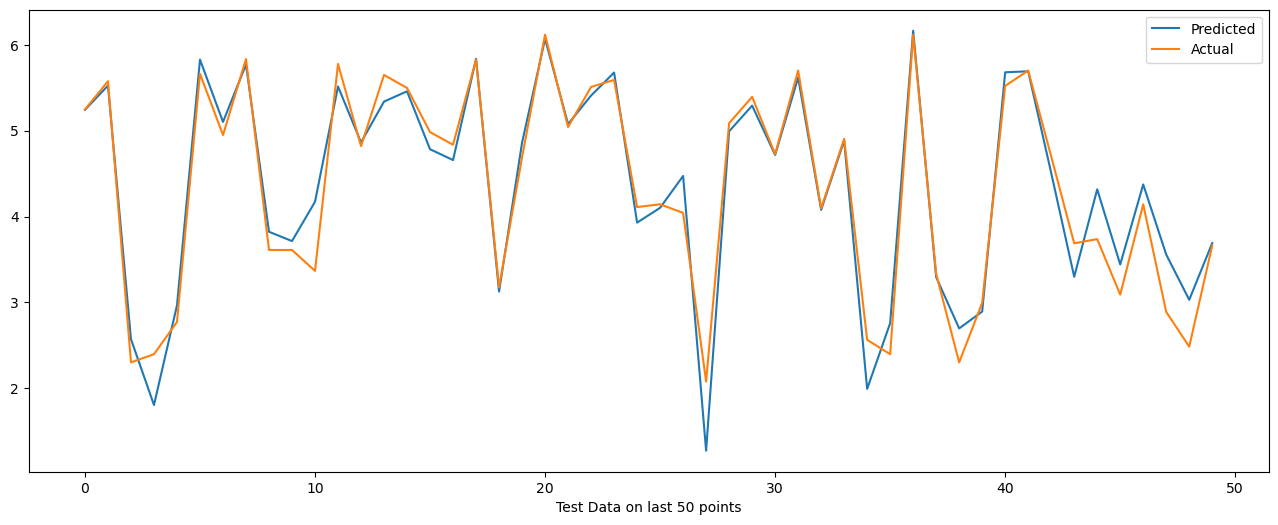

In [51]:
CAT_model.fit(X_train, y_train, cat_features=categorical_cols)

model_metrics = print_regression_metrics(CAT_model, X_test, y_test)

Kita dapat melakukan tunning pada model XGBoost untuk mendapatkan hasil metrics yang terbaik

## Tunning with GridSearchCV

In [52]:
# Grid search parameters
param_grid = {
    "iterations": [200, 500],
    "depth": [4, 6],
    "learning_rate": [0.05, 0.1],
    "l2_leaf_reg": [3, 5],
}


grid_search = GridSearchCV(
    estimator=CAT_model,
    param_grid=param_grid,
    scoring={
        'mae': 'neg_mean_absolute_error',
        'rmse': 'neg_root_mean_squared_error',
        'r2': 'r2',
        'mape': 'neg_mean_absolute_percentage_error'
    },
    refit='rmse',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train, cat_features=categorical_cols)

print('CATBoost')
print('Best_score:', grid_search.best_score_)
print('Best_params:', grid_search.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
0:	learn: 1.2464548	total: 23.6ms	remaining: 11.8s
1:	learn: 1.1571667	total: 49.4ms	remaining: 12.3s
2:	learn: 1.0814206	total: 74.6ms	remaining: 12.4s
3:	learn: 1.0059187	total: 100ms	remaining: 12.4s
4:	learn: 0.9423163	total: 125ms	remaining: 12.4s
5:	learn: 0.8867152	total: 150ms	remaining: 12.4s
6:	learn: 0.8385852	total: 177ms	remaining: 12.4s
7:	learn: 0.7977354	total: 202ms	remaining: 12.4s
8:	learn: 0.7629787	total: 228ms	remaining: 12.4s
9:	learn: 0.7278477	total: 253ms	remaining: 12.4s
10:	learn: 0.6973615	total: 278ms	remaining: 12.4s
11:	learn: 0.6685893	total: 303ms	remaining: 12.3s
12:	learn: 0.6453778	total: 328ms	remaining: 12.3s
13:	learn: 0.6212391	total: 352ms	remaining: 12.2s
14:	learn: 0.6049583	total: 377ms	remaining: 12.2s
15:	learn: 0.5860375	total: 402ms	remaining: 12.2s
16:	learn: 0.5696789	total: 427ms	remaining: 12.1s
17:	learn: 0.5555250	total: 453ms	remaining: 12.1s
18:	learn: 0.5392193	total: 

0:	learn: 1.2464548	total: 23.7ms	remaining: 11.8s
1:	learn: 1.1571667	total: 50.8ms	remaining: 12.7s
2:	learn: 1.0814206	total: 75.9ms	remaining: 12.6s
3:	learn: 1.0059187	total: 101ms	remaining: 12.5s
4:	learn: 0.9423163	total: 126ms	remaining: 12.5s
5:	learn: 0.8867152	total: 152ms	remaining: 12.5s
6:	learn: 0.8385852	total: 177ms	remaining: 12.5s
7:	learn: 0.7977354	total: 202ms	remaining: 12.4s
8:	learn: 0.7629787	total: 229ms	remaining: 12.5s
9:	learn: 0.7278477	total: 263ms	remaining: 12.9s
10:	learn: 0.6973615	total: 291ms	remaining: 13s
11:	learn: 0.6685893	total: 316ms	remaining: 12.9s
12:	learn: 0.6453778	total: 343ms	remaining: 12.8s
13:	learn: 0.6212391	total: 368ms	remaining: 12.8s
14:	learn: 0.6049583	total: 394ms	remaining: 12.7s
15:	learn: 0.5860375	total: 419ms	remaining: 12.7s
16:	learn: 0.5696789	total: 446ms	remaining: 12.7s
17:	learn: 0.5555250	total: 473ms	remaining: 12.7s
18:	learn: 0.5392193	total: 498ms	remaining: 12.6s
19:	learn: 0.5273280	total: 524ms	remain

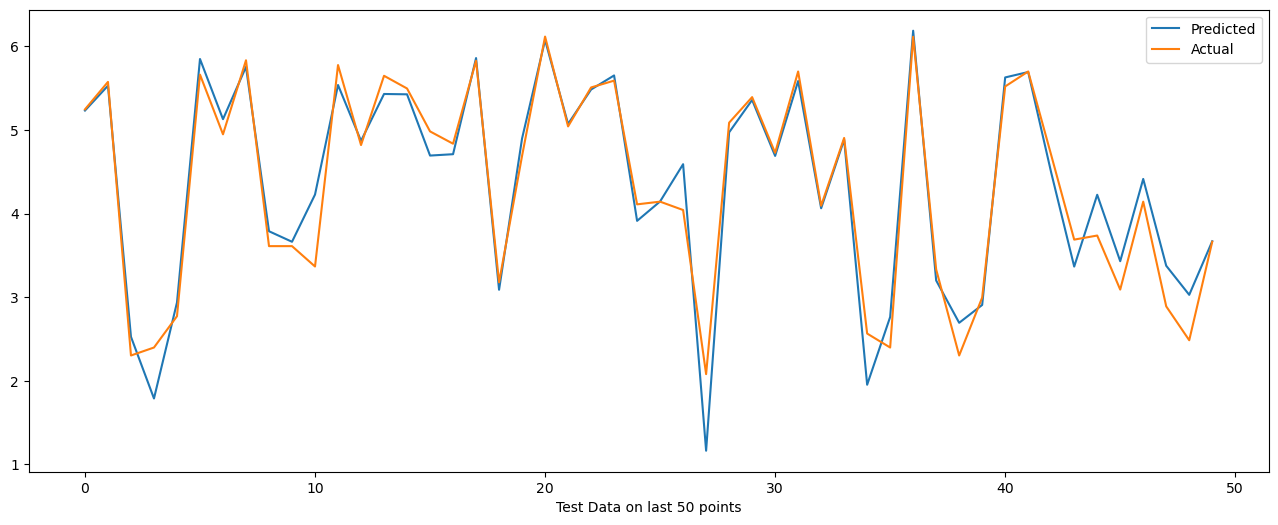

In [53]:
CATBoost_tunning_grid = grid_search.best_estimator_

CATBoost_tunning_grid.fit(X_train, y_train, cat_features=categorical_cols)

CATBoost_tunning_grid_result = print_regression_metrics(CATBoost_tunning_grid, X_test, y_test)


## Tunning with RandomSearchCV

RandomSearchCV digunakan untuk mendapatkan hasil tunning terbaik. Penggunaan RandomSearchCV dibanding dengan GridSearchCV dikarenakan keterbatasan resource serta penggunaan Parameter yang cukup besar

In [ ]:
param_grid = {
    "iterations": [200, 500, 700],
    "depth": [4, 6, 8, 10],
    "learning_rate": [0.01, 0.05, 0.1],
    "l2_leaf_reg": [1, 3, 5, 7, 9],
    "bagging_temperature": [0, 1, 3, 5],
    "random_strength": [1, 5, 10],
    "border_count": [32, 64, 128]
}
random_search = RandomizedSearchCV(
    estimator=CAT_model,
    param_distributions=param_grid,
    n_iter=50,
    scoring={
        'mae': 'neg_mean_absolute_error',
        'rmse': 'neg_root_mean_squared_error',
        'r2': 'r2',
        'mape': 'neg_mean_absolute_percentage_error'
    },
    refit='rmse', 
    cv=kf,
    verbose=True,
    random_state=2042,
    n_jobs=-1
)
random_search.fit(X_train, y_train, cat_features=categorical_cols)

print('CATBoost')
print('Best_score:', random_search.best_score_)
print('Best_params:', random_search.best_params_, "\n")

Fitting 5 folds for each of 50 candidates, totalling 250 fits


0:	learn: 1.2651428	total: 44.4ms	remaining: 22.2s
1:	learn: 1.1997278	total: 55ms	remaining: 13.7s
2:	learn: 1.1459995	total: 65.2ms	remaining: 10.8s
3:	learn: 1.0847394	total: 107ms	remaining: 13.2s
4:	learn: 1.0419836	total: 138ms	remaining: 13.7s
5:	learn: 0.9968901	total: 172ms	remaining: 14.2s
6:	learn: 0.9615810	total: 199ms	remaining: 14s
7:	learn: 0.9350354	total: 234ms	remaining: 14.4s
8:	learn: 0.9118270	total: 260ms	remaining: 14.2s
9:	learn: 0.8797951	total: 297ms	remaining: 14.6s
10:	learn: 0.8562711	total: 329ms	remaining: 14.6s
11:	learn: 0.8317210	total: 361ms	remaining: 14.7s
12:	learn: 0.8114295	total: 389ms	remaining: 14.6s
13:	learn: 0.7853191	total: 452ms	remaining: 15.7s
14:	learn: 0.7727288	total: 475ms	remaining: 15.4s
15:	learn: 0.7508130	total: 539ms	remaining: 16.3s
16:	learn: 0.7364060	total: 579ms	remaining: 16.5s
17:	learn: 0.7259990	total: 641ms	remaining: 17.2s
18:	learn: 0.6999848	total: 702ms	remaining: 17.8s
19:	learn: 0.6871016	total: 738ms	remainin

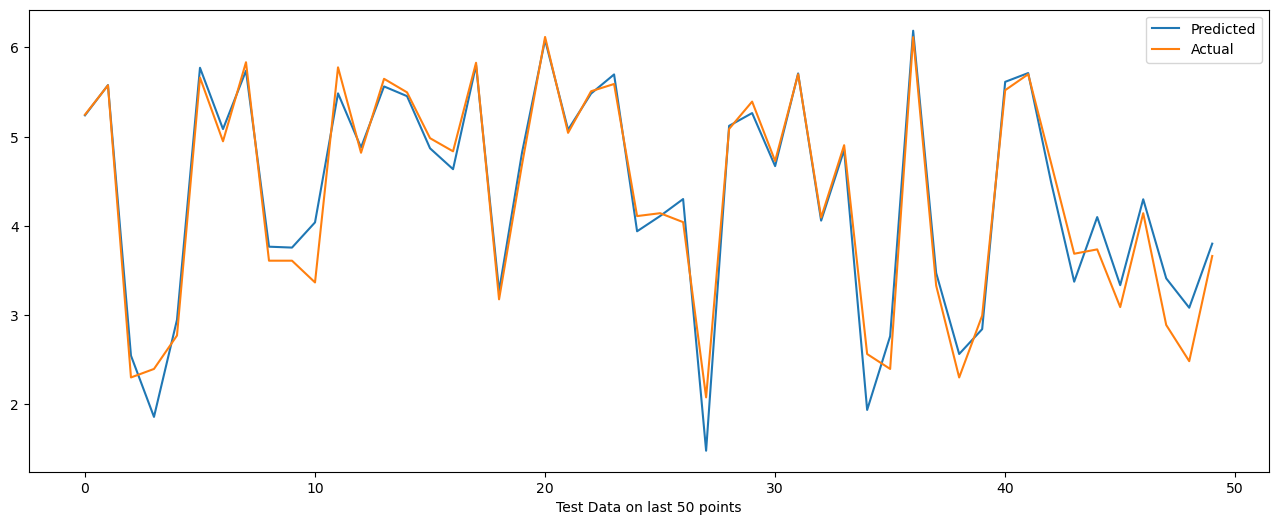

In [ ]:
CATBoost_tunning_random = random_search.best_estimator_

CATBoost_tunning_random.fit(X_train, y_train, cat_features=categorical_cols)

CATBoost_tunning_random_result = print_regression_metrics(CATBoost_tunning_random, X_test, y_test)

In [ ]:
import pickle 

with open("catboost_be st_model.pkl", "wb") as file:
    pickle.dump(CATBoost_tunning_random, file)

In [ ]:
metrics_df_untunning = pd.DataFrame([model_metrics], index=["Without Tunning"])
metrics_df_tunning_grid = pd.DataFrame([CATBoost_tunning_grid_result], index=["Grid Tunning"])
metrics_df_tunning_random = pd.DataFrame([CATBoost_tunning_random_result], index=["Random Tunning"])

comparation_metrics = pd.concat([metrics_df_untunning, metrics_df_tunning_grid, metrics_df_tunning_random])

comparation_metrics.round(4)

MAE     RMSE      R2    MAPE
Without Tunning  19.9716  32.3896  0.9287  0.2447
Grid Tunning     20.0644  32.5511  0.9279  0.2448
Random Tunning   18.7655  30.4804  0.9368  0.2352

Dari hasil di atas, terlihat bahwa penggunaan Hyperparameter Tunning dengan metode **RandomSearchCV** menghasilkan hasil yang terbaik

C:\Users\USER\AppData\Local\Temp\ipykernel_19240\1050997802.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


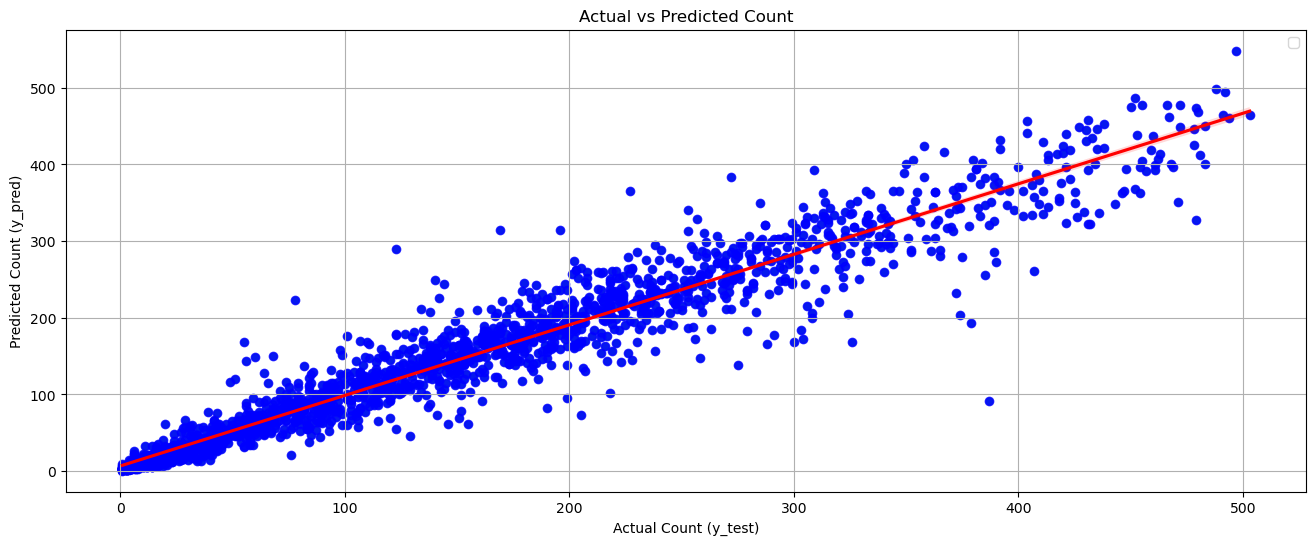

In [ ]:
y_pred = CATBoost_tunning_random.predict(X_test)

# # Inverse log1p transform
y_pred_exp = np.expm1(y_pred)
y_test_exp = np.expm1(y_test)

# Plot
plt.figure(figsize=(16, 6))
sns.scatterplot(x=y_test_exp, y=y_pred_exp)

sns.regplot(x=y_test_exp, y=y_pred_exp, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.xlabel("Actual Count (y_test)")
plt.ylabel("Predicted Count (y_pred)")
plt.title("Actual vs Predicted Count")
plt.legend()
plt.grid(True)
plt.show()


## Model Limitation

In [ ]:
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, np.inf]
labels = [
    "<=50", "51-100", "101-150", "151-200", "201-250", "251-300",
    "301-350", "351-400", "401-450", "451-500", ">501"
]

results = []

y_test_inv = np.expm1(y_test)
y_pred_inv = np.expm1(y_pred)


df_eval = pd.DataFrame({
    "y_true": y_test_inv,
    "y_pred": y_pred_inv
})
df_eval["bin"] = pd.cut(df_eval["y_pred"], bins=bins, labels=labels)

for label in labels:
    bin_data = df_eval[df_eval["bin"] == label]
    
    if len(bin_data) > 0:
        mae = mean_absolute_error(bin_data["y_true"], bin_data["y_pred"])
        mape = mean_absolute_percentage_error(bin_data["y_true"], bin_data["y_pred"])
        rmse = mean_squared_error(bin_data["y_true"], bin_data["y_pred"])
        r2 = r2_score(bin_data["y_true"], bin_data["y_pred"])
    else:
        mae = None
        mape = None
        rmse = None
        r2 = None

    results.append({
        "Range": label,
        "Score MAE": mae,
        "Score MAPE": mape,
        "Score RMSE": rmse,
        "Score R2": r2
    })

overall_mae = mean_absolute_error(df_eval["y_true"], df_eval["y_pred"])
overall_mape = mean_absolute_percentage_error(df_eval["y_true"], df_eval["y_pred"])
overall_rmse = mean_squared_error(df_eval["y_true"], df_eval["y_pred"])
overall_r2 = r2_score(df_eval["y_true"], df_eval["y_pred"])

results.append({
    "Range": f"All Count Range (Max {int(df_eval['y_pred'].max())})",
    "Score MAE": overall_mae,
    "Score MAPE": overall_mape,
    "Score RMSE": overall_rmse,
    "Score R2": overall_r2
})

df_limit_test = pd.DataFrame(results)

df_limit_test

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Range  Score MAE  Score MAPE   Score RMSE  Score R2
0                        <=50   5.220549    0.414856    70.385435  0.742415
1                      51-100  17.676207    0.219886   897.054722  0.179295
2                     101-150  20.902953    0.172048   860.357382  0.220398
3                     151-200  24.596862    0.141342  1327.731597  0.150364
4                     201-250  26.635825    0.124222  1402.081433  0.085297
5                     251-300  32.507856    0.119849  1842.711923  0.119141
6                     301-350  34.789119    0.104141  2239.271596  0.098236
7                     351-400  40.152133    0.105281  2650.828505 -0.036280
8                     401-450  28.870548    0.068050  1282.634308  0.061368
9                     451-500  20.153889    0.044113   604.480732  0.101457
10                       >501  51.149430    0.102916  2616.264231       NaN
11  All Count Range (Max 548)  18.765515    0.235192   929.056743  0.936817

## Feature Importances

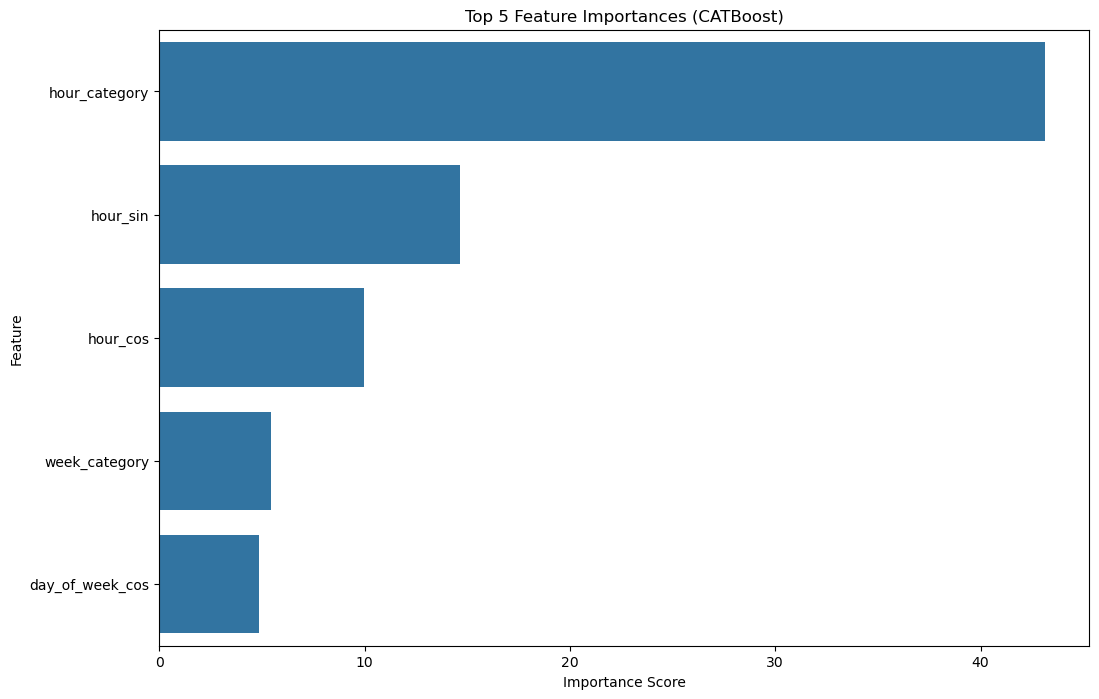

In [ ]:
feature_names = X_train.columns

importances = CATBoost_tunning_random.feature_importances_

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df[:5], x="Importance", y="Feature")
plt.title("Top 5 Feature Importances (CATBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


# Conclusion

Berdasarkan hasil yang uji yang telah dilakukan di atas, maka kita dapat melihat bahwa : 

1. Hasil Model terbaik adalah CATBoost dengan hasil

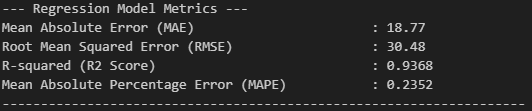


2. Parameter Tunning terbaik yang dapat digunakan oleh model XGBoost melalui RandomSearchCV adalah :
    a. 'random_strength': 10<br>
    b. 'learning_rate': 0.1<br>
    c. 'l2_leaf_reg': 5<br>
    d. 'iterations': 500<br>
    e. 'depth': 10<br>
    f. 'border_count': 128<br>
    e. 'bagging_temperature': 1<br> 

3. Feature Importance yang sangat berpengaruh adalah 
    a. hour_category<br>
    b. hour_sin<br>
    c. hour_cos<br>
    d. week_category<br>
    e. day_of_week<br>